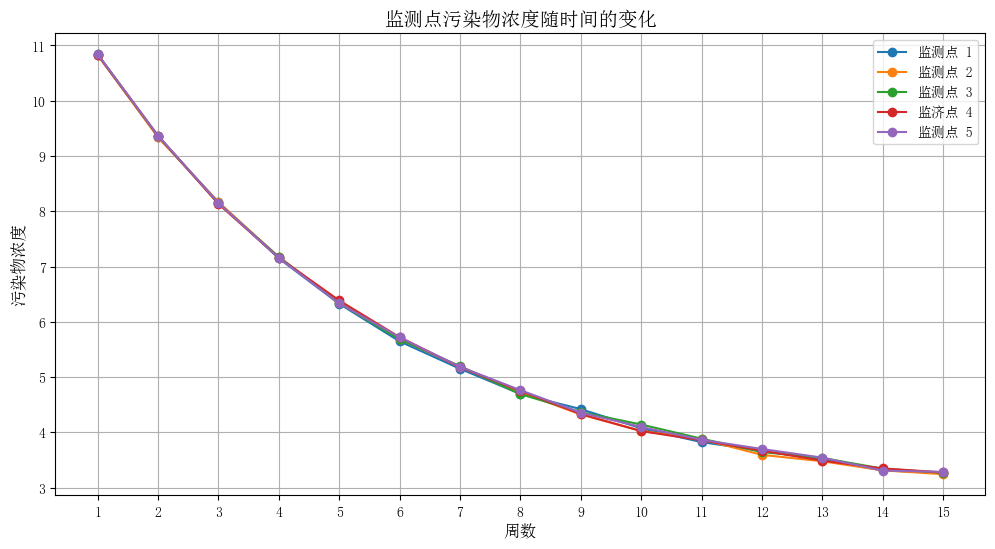

In [2]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.sans-serif'] = ['SimSun']

# 数据
weeks = np.arange(1, 16)
monitoring_points = {
    "监测点 1": [10.8366, 9.35012, 8.16433, 7.1481, 6.3267, 5.64729, 5.15103, 4.69592, 4.42042, 4.0741, 3.82257, 3.66742, 3.50337, 3.31069, 3.26862],
    "监测点 2": [10.8286, 9.33735, 8.16756, 7.16879, 6.35153, 5.69483, 5.18964, 4.72477, 4.32338, 4.02744, 3.8737, 3.59325, 3.47648, 3.31237, 3.24237],
    "监测点 3": [10.8418, 9.36265, 8.1424, 7.17691, 6.33866, 5.68283, 5.19767, 4.69179, 4.3661, 4.14201, 3.88571, 3.64282, 3.5374, 3.34224, 3.26983],
    "监济点 4": [10.8313, 9.36667, 8.13454, 7.16098, 6.38672, 5.72216, 5.1787, 4.7502, 4.3312, 4.02247, 3.85653, 3.66924, 3.48706, 3.34739, 3.27488],
    "监测点 5": [10.8413, 9.36858, 8.15106, 7.15679, 6.33468, 5.72069, 5.18579, 4.76333, 4.35653, 4.09824, 3.86492, 3.69893, 3.54225, 3.30775, 3.2847]
}

# 绘图
plt.figure(figsize=(12, 6))
for point, values in monitoring_points.items():
    plt.plot(weeks, values, label=point, marker='o')

plt.xlabel('周数', fontname='SimSun', fontsize=12)
plt.ylabel('污染物浓度', fontname='SimSun', fontsize=12)
plt.title('监测点污染物浓度随时间的变化', fontname='SimSun', fontsize=14)
plt.xticks(weeks)
plt.legend()
plt.grid(True)
plt.show()


In [3]:
from sympy import Function, dsolve, Eq, Derivative, symbols

# 定义符号和函数
t = symbols('t')
y = Function('y')(t)
A, V = symbols('A V')

# 齐次方程
homogeneous_eq = Eq(Derivative(y, t) + (A/V) * y, 0)

# 求解齐次方程
homogeneous_solution = dsolve(homogeneous_eq)
homogeneous_solution


Eq(y(t), C1*exp(-A*t/V))

In [4]:
from scipy.optimize import curve_fit
import numpy as np

# 监测点1的数据和对应的时间
y_data = np.array([10.8366, 9.35012, 8.16433, 7.1481, 6.3267, 5.64729, 5.15103, 4.69592, 4.42042, 4.0741, 3.82257, 3.66742, 3.50337, 3.31069, 3.26862])
t_data = np.arange(1, 16)

# 定义拟合函数
def fit_function(t, C1, b, r):
    return C1 * np.exp(-b * t) + r

# 使用非线性最小二乘法拟合
initial_guess = [1, 0.1, 3]  # 初始猜测值
params, covariance = curve_fit(fit_function, t_data, y_data, p0=initial_guess)

# 输出拟合得到的参数
params_dict = {'C1': params[0], 'b': params[1], 'r': params[2]}
params_dict


{'C1': 9.870009900572366, 'b': 0.20520122462834667, 'r': 2.8033295890985346}

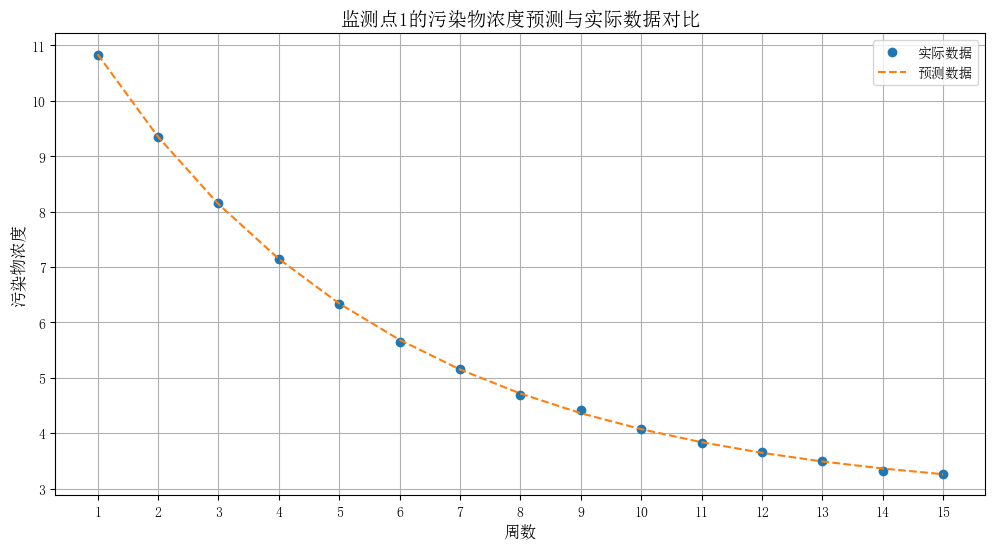

In [5]:
# 使用拟合得到的参数预测污染物浓度
C1, b, r = params
predicted_y = fit_function(t_data, C1, b, r)

# 绘图比较预测数据与实际数据
plt.figure(figsize=(12, 6))
plt.plot(t_data, y_data, 'o', label='实际数据')
plt.plot(t_data, predicted_y, label='预测数据', linestyle='--')
plt.xlabel('周数', fontname='SimSun', fontsize=12)
plt.ylabel('污染物浓度', fontname='SimSun', fontsize=12)
plt.title('监测点1的污染物浓度预测与实际数据对比', fontname='SimSun', fontsize=14)
plt.xticks(t_data)
plt.legend()
plt.grid(True)
plt.show()


In [6]:
# 预测第20周和第30周的污染物浓度
predicted_week_20 = fit_function(20, C1, b, r)
predicted_week_30 = fit_function(30, C1, b, r)

predicted_week_20, predicted_week_30



(2.9662450860808653, 2.824260339666318)

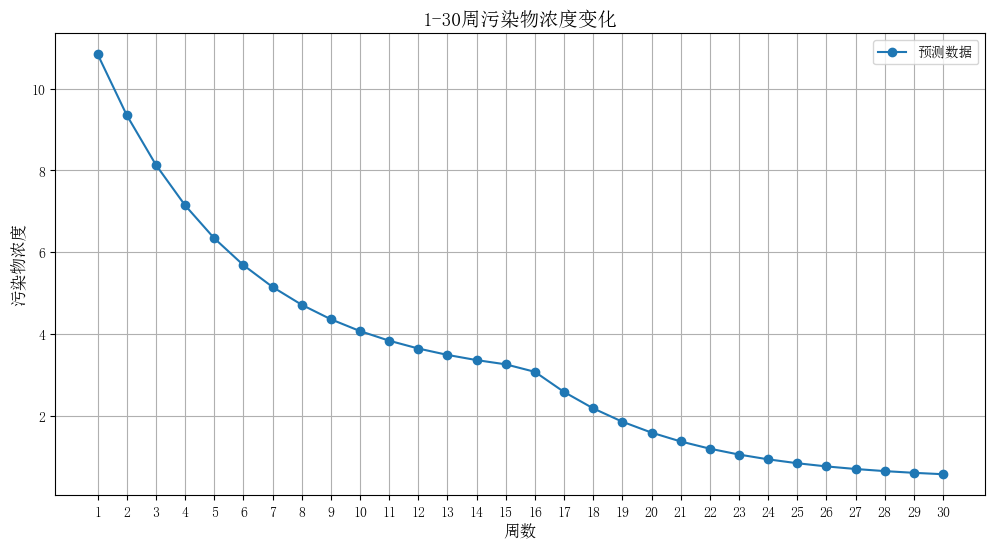

In [14]:
# 定义新的拟合函数，考虑第15周后r值的变化
def modified_fit_function(t, C1, b, r, r_new, change_week):
    if t <= change_week:
        return C1 * np.exp(-b * t) + r
    else:
        # 重新计算C1值，考虑到在第15周的连续性
        C1_new = C1 * np.exp(-b * change_week )+ r
        return C1_new * np.exp(-b * (t - change_week)) + r_new

# 计算第15周后r的新值
r_new = r * 3 / 20
change_week = 15

# 生成1-30周的时间数据
t_data_extended = np.arange(1, 31)

# 计算1-30周的污染物浓度
y_data_extended = [modified_fit_function(t, C1, b, r, r_new, change_week) for t in t_data_extended]

# 绘制1-30周的污染物浓度变化图像
plt.figure(figsize=(12, 6))
plt.plot(t_data_extended, y_data_extended, label='预测数据', marker='o')
plt.xlabel('周数', fontname='SimSun', fontsize=12)
plt.ylabel('污染物浓度', fontname='SimSun', fontsize=12)
plt.title('1-30周污染物浓度变化', fontname='SimSun', fontsize=14)
plt.xticks(t_data_extended)
plt.legend()
plt.grid(True)
plt.show()


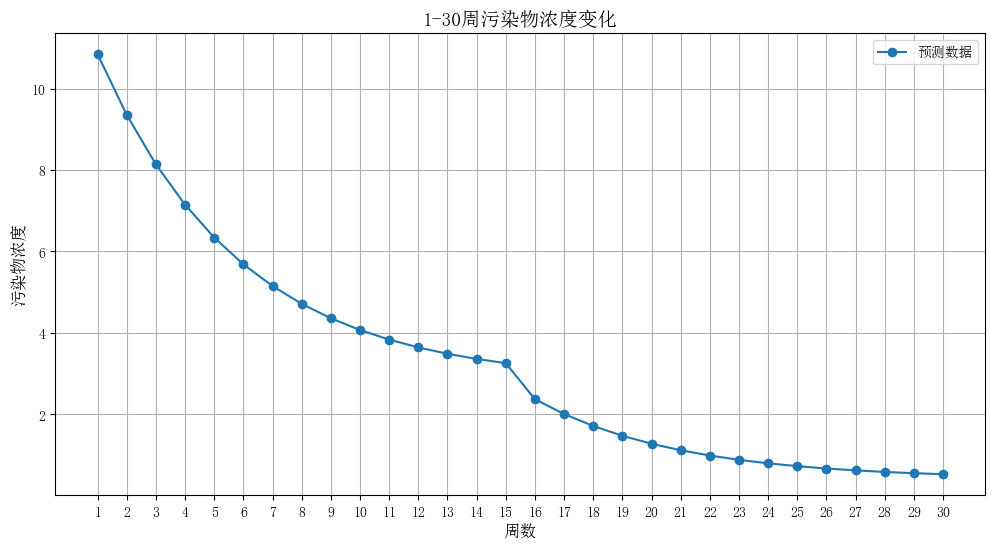

In [16]:
# 定义新的拟合函数，考虑第15周后r值的变化
def modified_fit_function(t, C1, b, r, r_new, change_week):
    if t <= change_week:
        return C1 * np.exp(-b * t) + r
    else:
        # 重新计算C1值，考虑到在第15周的连续性
        C1_new = (C1 * np.exp(-b * (change_week - 1)) + r) - r_new
        return C1_new * np.exp(-b * (t - change_week + 1)) + r_new

# 计算第15周后r的新值
r_new = r * 3 / 20
change_week = 15

# 生成1-30周的时间数据
t_data_extended = np.arange(1, 31)

# 计算1-30周的污染物浓度
y_data_extended = [modified_fit_function(t, C1, b, r, r_new, change_week) for t in t_data_extended]

# 绘制1-30周的污染物浓度变化图像
plt.figure(figsize=(12, 6))
plt.plot(t_data_extended, y_data_extended, label='预测数据', marker='o')
plt.xlabel('周数', fontname='SimSun', fontsize=12)
plt.ylabel('污染物浓度', fontname='SimSun', fontsize=12)
plt.title('1-30周污染物浓度变化', fontname='SimSun', fontsize=14)
plt.xticks(t_data_extended)
plt.legend()
plt.grid(True)
plt.show()


# 作业
- 完成IMMC A题 的第三问，建立数学模型，并将建模过程整理在word 文档中，在下周一（12月27日）晚20：00之前发送大 learningmm@163.com